
 Îmbunătățiri medii per context:
               Δ_time(%)  Δ_errors(%)  Δ_satisfaction(%)
Context                                                
dispozitiv       -12.25       -35.28              12.85
luminozitate     -14.72       -25.33              12.87
mișcare          -11.94       -56.00              14.12
zgomot           -11.69       -18.75              11.01


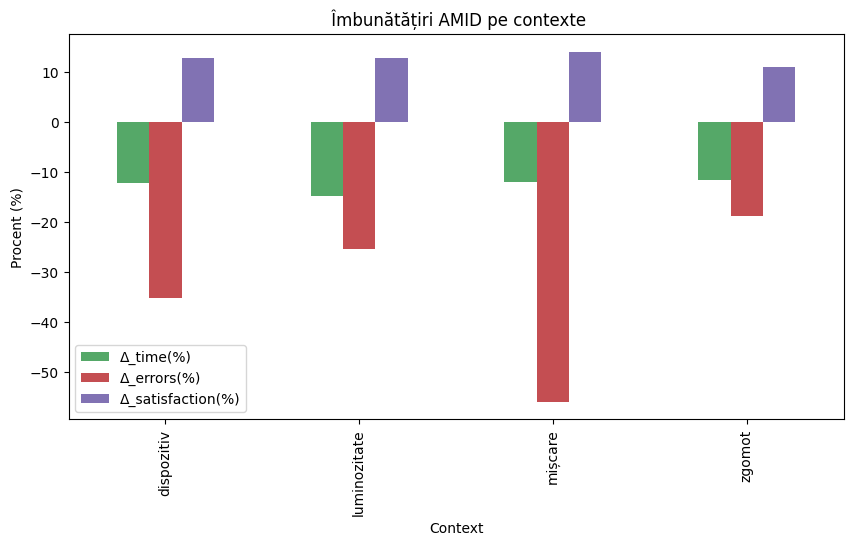

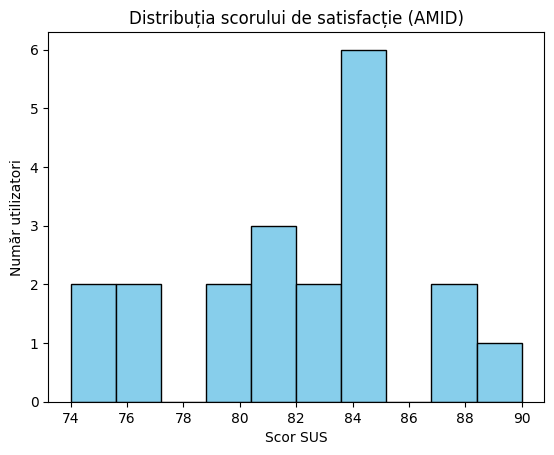


 Performanță AMID per context și dispozitiv:
 Device        desktop  laptop  tabletă  telefon
Context                                        
dispozitiv     -11.97  -11.45    -9.87   -17.33
luminozitate   -14.19     NaN   -10.00   -21.01
mișcare        -10.21     NaN   -16.55   -11.37
zgomot            NaN   -9.04   -21.05    -7.64

 Rezumat general:
Timp mediu îmbunătățit cu: 12.68%
Erori reduse cu: 34.67%
Satisfacție crescută cu: 12.81%


ModuleNotFoundError: No module named 'openpyxl'

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Citire și curățare fișier 
df = pd.read_csv("input_data_experiment.csv", sep=";", encoding="utf-8")
df.columns = df.columns.str.strip().str.replace('\ufeff', '')

# Simulare realistă a îmbunătățirilor (cu variații aleatorii) 
np.random.seed(42)
df["Time_AMID"] = df["Time_Standard"] - np.random.randint(10, 30, len(df))
df["Errors_AMID"] = df["Errors_Standard"] - np.random.choice([0,1,2], len(df))
df["Satisfaction_AMID"] = df["Satisfaction_Standard"] + np.random.randint(5, 15, len(df))

# Calcul îmbunătățiri procentuale 
df["Δ_time(%)"] = ((df["Time_AMID"] - df["Time_Standard"]) / df["Time_Standard"]) * 100
df["Δ_errors(%)"] = ((df["Errors_AMID"] - df["Errors_Standard"]) / df["Errors_Standard"]) * 100
df["Δ_satisfaction(%)"] = ((df["Satisfaction_AMID"] - df["Satisfaction_Standard"]) / df["Satisfaction_Standard"]) * 100

# Analiză per context 
context_stats = df.groupby("Context")[["Δ_time(%)", "Δ_errors(%)", "Δ_satisfaction(%)"]].mean().round(2)
print("\n Îmbunătățiri medii per context:\n", context_stats)

# Vizualizare comparativă per context 
context_stats.plot(kind="bar", figsize=(10,5), title=" Îmbunătățiri AMID pe contexte", color=["#55a868", "#c44e52", "#8172b3"])
plt.ylabel("Procent (%)")
plt.show()

# Distribuție generală a satisfacției 
plt.hist(df["Satisfaction_AMID"], bins=10, color="skyblue", edgecolor="black")
plt.title("Distribuția scorului de satisfacție (AMID)")
plt.xlabel("Scor SUS")
plt.ylabel("Număr utilizatori")
plt.show()

# Tabel pivot: performanță pe dispozitiv și context 
pivot_perf = df.pivot_table(values="Δ_time(%)", index="Context", columns="Device", aggfunc="mean").round(2)
print("\n Performanță AMID per context și dispozitiv:\n", pivot_perf)

# Rezumat global 
print("\n Rezumat general:")
print(f"Timp mediu îmbunătățit cu: {abs(df['Δ_time(%)'].mean()):.2f}%")
print(f"Erori reduse cu: {abs(df['Δ_errors(%)'].mean()):.2f}%")
print(f"Satisfacție crescută cu: {df['Δ_satisfaction(%)'].mean():.2f}%")

# Salvare rezultate 
df.to_csv("results.csv", index=False)
print(" Rezultatele finale au fost salvate în results.csv")
